In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
df = pd.read_csv("tcs.csv")

In [17]:
df['Target'] = (df['Tata Close'].shift(-1) > df['Tata Close']).astype(int)
df = df[:-1] 

In [19]:
features = ['Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Volume']
X = df[features]
y = df['Target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [27]:
y_pred = model.predict(X_test_scaled)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


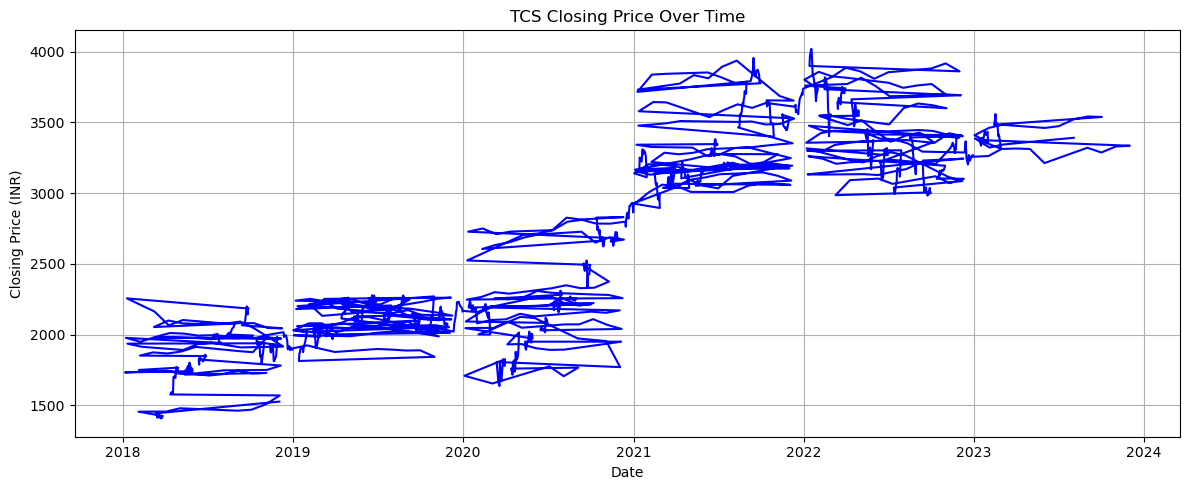

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Safely parse mixed or inconsistent date formats
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

# 📈 Plot Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Tata Close'], color='blue')
plt.title('TCS Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
pip install mplfinance



   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.0 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00


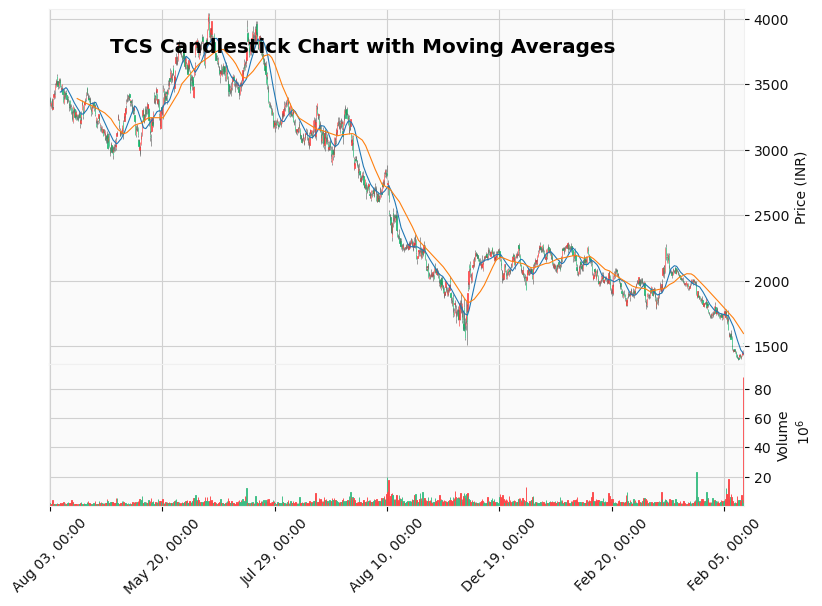

In [51]:
import mplfinance as mpf
import pandas as pd

# Convert Date column and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df.set_index('Date', inplace=True)

# Rename columns for mplfinance compatibility
df_ohlc = df.rename(columns={
    'Tata Open': 'Open',
    'Tata High': 'High',
    'Tata Low': 'Low',
    'Tata Close': 'Close',
    'Tata Volume': 'Volume'
})

# Plot candlestick chart with 20 & 50 day moving averages
mpf.plot(
    df_ohlc,
    type='candle',
    style='yahoo',
    title='TCS Candlestick Chart with Moving Averages',
    mav=(20, 50),
    volume=True,
    ylabel='Price (INR)',
    ylabel_lower='Volume',
    tight_layout=True
)



In [53]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 0.8825910931174089
Confusion Matrix:
 [[126   9]
 [ 20  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90       135
           1       0.91      0.82      0.86       112

    accuracy                           0.88       247
   macro avg       0.89      0.88      0.88       247
weighted avg       0.88      0.88      0.88       247



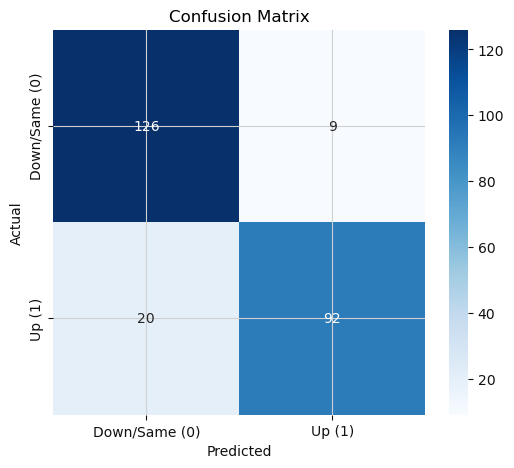

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Down/Same (0)', 'Up (1)']

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

